<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;">Wer ist das? – Hollywood-Stars erkennen mit KI

# <span style="font-family:serif; font-size:28px;"> Inhalt</span>
1. [Einleitung](#1)
2. [Laden von Bibliotheken und Daten](#2)
3. [Erste Datenanalyse (EDA – Exploratory Data Analysis)](#6)
4. [Darstellung fehlender Werte (missing values)](#7)
5. [Daten Manipulation](#8)
6. [Daten Visualisierungen](#9)
7. [Datenaufbereitung (Preprocessing)](#10)
   * [Standardizing numeric attributes](#111)
8. [Bewertung von Modellen und Vorhersagen durch maschinelles Lernen](#11)
   * [KNN](#101)
   * [SVC](#102)
   * [Random Forest](#103)
   * [Logistic Regression](#104)
   * [Decision Tree Classifier](#105)
9. [Modell speichern](#12)

<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Einleitung</span>
<a id = "Einleitung" ></a>

<span style="font-size:16px;"> In einer zunehmend digitalisierten Welt gewinnt die automatische Gesichtserkennung immer mehr an Bedeutung. Ob in sozialen Netzwerken, in der automatisierten Bildarchivierung oder im Bereich der Sicherheit – die Fähigkeit, Personen anhand von Bildern zuverlässig zu identifizieren, eröffnet zahlreiche Anwendungsmöglichkeiten. Insbesondere im Bereich der Prominenzerkennung bietet diese Technologie spannende Einsatzfelder, etwa in Medienarchiven, Film-Datenbanken oder Fan-Plattformen.

<span style="font-size:16px;"> Im Rahmen meines dritten Data-Science-Projekts beschäftige ich mich daher mit der Entwicklung eines Klassifikationsmodells, das in der Lage ist, berühmte Hollywood-Schauspielerinnen anhand von Porträtbildern zu erkennen. Dabei geht es nicht nur um die technische Herausforderung, sondern auch um das Zusammenspiel zwischen Datenauswahl, Bildverarbeitung und dem Training eines robusten Modells.

<span style="font-size:16px;"> Ein zentraler Bestandteil der Bildverarbeitung ist die automatisierte Gesichtserkennung. Hierfür kommt der Haar Cascade Classifier zum Einsatz – ein bewährtes Verfahren, das mithilfe von vortrainierten Klassifikatoren Gesichter in Bildern zuverlässig lokalisiert. Die so erkannten Gesichter werden anschließend für die weitere Verarbeitung extrahiert, skaliert und dem neuronalen Netzwerk zur Klassifikation übergeben.

<span style="font-size:16px;"> Zur Umsetzung wird ein Deep-Learning-Ansatz verfolgt, bei dem Convolutional Neural Networks (CNNs) zum Einsatz kommen – eine Methode, die sich besonders für bildbasierte Aufgaben bewährt hat. Die Datengrundlage besteht aus öffentlich verfügbaren Bildern, die mithilfe von Python, OpenCV und Keras/TensorFlow aufbereitet und analysiert werden. Ziel ist es, ein möglichst genaues Klassifikationsmodell zu entwickeln und dabei sowohl die technischen als auch die ethischen Aspekte der Gesichtserkennung zu reflektieren.

<a id = "2" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Datenkollektion</span>
<a id="collection"></a>

<span style="font-size:16px;">Für dieses Projekt wurden Bilddaten von fünf international bekannten Hollywood-Schauspielerinnen verwendet:<span style="font-size:20px;"> Margot Robbie, Jennifer Lawrence, Scarlett Johansson, Monica Bellucci und Anne Hathaway. 
<span style="font-size:16px;">Die Auswahl dieser Persönlichkeiten erfolgte auf Basis ihrer hohen medialen Präsenz sowie der guten Verfügbarkeit qualitativ hochwertiger Bilder im Internet.

<span style="font-size:16px;">Die Bilder wurden mithilfe des Faktum-Chrom-Tools direkt aus der Google-Bildersuche heruntergeladen. Dieses Tool ermöglicht eine effiziente und strukturierte Sammlung großer Bildmengen, die anschließend manuell überprüft und bereinigt wurden, um unpassende oder fehlerhafte Aufnahmen zu entfernen.

<span style="font-size:16px;">Die finalen Bilddaten wurden in einem Verzeichnis namens "dataset" gespeichert. Jede Schauspielerin hat dabei ihren eigenen Unterordner erhalten, was eine strukturierte Datenorganisation und eine einfache Nutzung für das Training des Modells mit Frameworks wie Keras oder PyTorch ermöglicht.

<a id = "3" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Laden von Bibliotheken und Daten</span>
<a id="laden"></a>

In [136]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sn
import os
import cv2
import pywt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import joblib 
import json

In [3]:

img= cv2.imread("/Users/coco/Desktop/Hollywood Actress Classifier/Model/test images/_url=https_3A_2F_2Fcalifornia-times-brightspot.s3.amazonaws.com_2Fbe_2Fd6_2F0cccd7b441ac9aceee6b4a802e9e_2Fthrs-2024-women-in-entertainment-gala-35106.jpg")
img.shape

(800, 1200, 3)

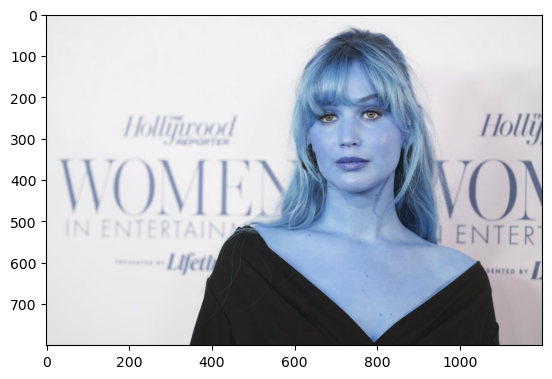

In [5]:
plt.imshow(img)
plt.show()

In [7]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 1200)

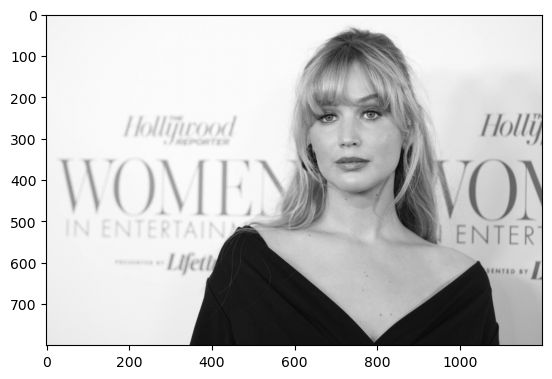

In [9]:
plt.imshow(gray,cmap="gray")
plt.show()

<a id = "4" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Bilder Preprocessing & Cleaning</span>
<a id = "Image Preprocessing & Cleaning" ></a>

In [11]:
face_cascade= cv2.CascadeClassifier("/Users/coco/Desktop/Hollywood Actress Classifier/Model/opencv/haarcascade_frontalface_default.xml")
eye_cascade =cv2.CascadeClassifier("/Users/coco/Desktop/Hollywood Actress Classifier/Model/opencv/haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[564, 105, 347, 347]], dtype=int32)

In [13]:
(x,y,w,h)=faces[0]
x,y,w,h

(564, 105, 347, 347)

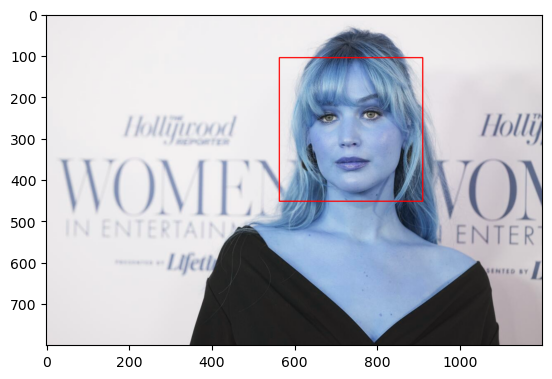

In [15]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

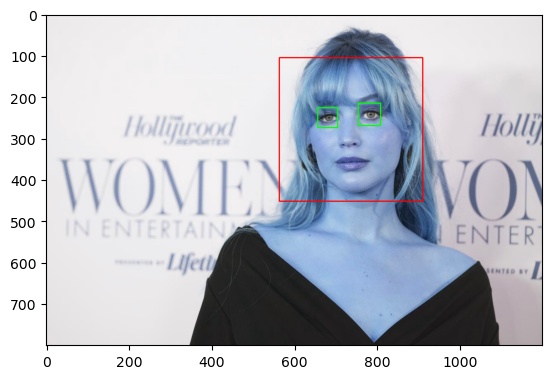

In [19]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # rot für Gesicht
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    roi_gray_upper = roi_gray[0:int(h/2), :] # für Augen nur den overen Bereich durchsuchen damit man Nase und Mund vermeidet
    roi_color_upper = roi_color[0:int(h/2), :]
    eyes = eye_cascade.detectMultiScale(roi_gray_upper)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # grün für Augen
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


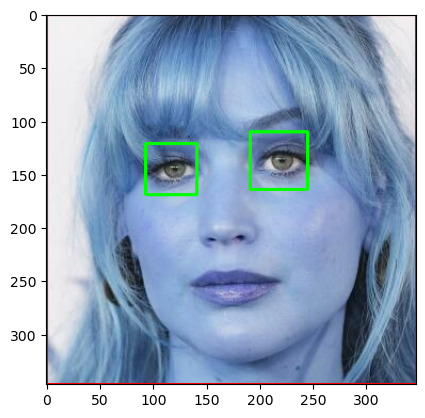

In [21]:
# Region of intrest(ROI)
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [23]:
# eine Funktion definieren wo ich diese ROI speichern kann um später für Modellierung benutzen kann. 
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Bild konnte nicht geladen werden: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

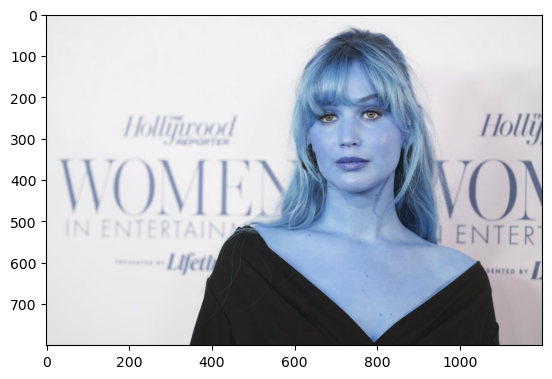

In [25]:
orginal_img= cv2.imread("/Users/coco/Desktop/Hollywood Actress Classifier/Model/test images/_url=https_3A_2F_2Fcalifornia-times-brightspot.s3.amazonaws.com_2Fbe_2Fd6_2F0cccd7b441ac9aceee6b4a802e9e_2Fthrs-2024-women-in-entertainment-gala-35106.jpg")
plt.imshow(orginal_img)
plt.show()

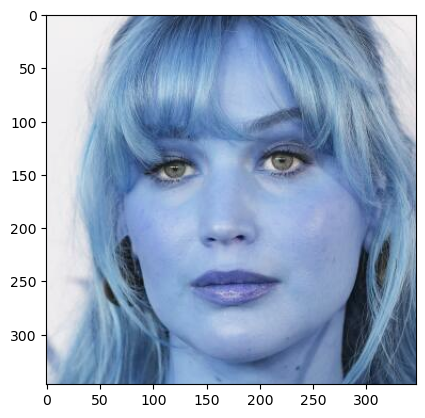

In [27]:
cropped_img= get_cropped_image_if_2_eyes(("/Users/coco/Desktop/Hollywood Actress Classifier/Model/test images/_url=https_3A_2F_2Fcalifornia-times-brightspot.s3.amazonaws.com_2Fbe_2Fd6_2F0cccd7b441ac9aceee6b4a802e9e_2Fthrs-2024-women-in-entertainment-gala-35106.jpg"))
plt.imshow(cropped_img)
plt.show()

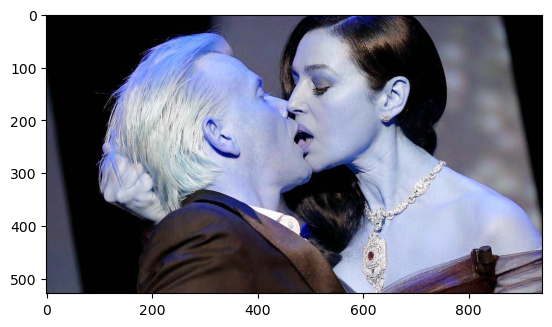

In [29]:
orginal_img_obstructed= cv2.imread("/Users/coco/Desktop/Hollywood Actress Classifier/Model/test images/w940_h528_x470_y264_d9f9ef8280f64e1c.jpg")
plt.imshow(orginal_img_obstructed)
plt.show()

In [31]:
cropped_img_obstructed= get_cropped_image_if_2_eyes("/Users/coco/Desktop/Hollywood Actress Classifier/Model/test images/w940_h528_x470_y264_d9f9ef8280f64e1c.jpg")
cropped_img_obstructed
plt.show()


* Hier in das Bild sind keine Augen zur erkennen deswegen das cropped Image is leer.

<a id = "4" ></a>
# <span style="font-family:serif; font-size:22px;"> 4.1 Erstellung eines neuen Verzeichnisses für die ausgeschnittenen Gesichter</span>
<a id = "Image Preprocessing & Cleaning" ></a>

<span style="font-size:16px;">Um die erkannten Gesichter effizient weiterverarbeiten und für das Modelltraining nutzen zu können, wurde ein neues Verzeichnis zur Speicherung der gecroppten (ausgeschnittenen) Gesichtsbereiche erstellt. Jedes erkannte Gesicht wird aus dem Originalbild extrahiert, auf eine einheitliche Größe skaliert und anschließend in der entsprechenden Kategorie gespeichert.

<span style="font-size:16px;">Diese Struktur erleichtert sowohl die Organisation der Bilddaten als auch die direkte Verwendung im Trainingsprozess. Die Gesichtsausschnitte dienen somit als bereinigter Input für das Klassifikationsmodell und tragen zur Verbesserung der Modellgenauigkeit bei, da sie nur die relevanten Bildinformationen enthalten.

In [33]:
path_to_data="/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/"
path_to_cr_data="/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/"

In [35]:
import os # HIER geht os in alle dataset path und nimmt sich die unter folders 
img_dirs = [] # und speichert die in diese Liste
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [37]:
img_dirs

['/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/scarlett johansson ',
 '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/monica bellucci',
 '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/margot robbie',
 '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/jennifer lawrence ',
 '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/anne hathaway ',
 '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped']

In [39]:
# wenn keine cropped Folder da ist eine machen
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data) # remove it if it exist
os.mkdir(path_to_cr_data) # make direct will creat the Folder

In [41]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # Schauspielername aus dem Ordnernamen
    print(f"Verarbeite Bilder für: {celebrity_name}")
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir): ## Durchlaufe alle Dateien (Bilder) im jeweiligen Ordner
                                       
        if entry.is_file():  # Ist es wirklich eine Datei (kein Ordner)?
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("➤ Erstelle neuen Ordner für gecroppte Bilder:", cropped_folder)
                
                cropped_file_name = f"{celebrity_name}_{count}.png" # Das cropped bildname mit zahl 
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, roi_color) ## Speichere das gecroppte Gesicht an der richtigen Stelle ab
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path) ## Füge den gespeicherten Pfad zur Liste hinzu
                count += 1


Verarbeite Bilder für: scarlett johansson 
➤ Erstelle neuen Ordner für gecroppte Bilder: /Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson 
⚠️ Bild konnte nicht geladen werden: /Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/scarlett johansson /.DS_Store
Verarbeite Bilder für: monica bellucci
➤ Erstelle neuen Ordner für gecroppte Bilder: /Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/monica bellucci
⚠️ Bild konnte nicht geladen werden: /Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/monica bellucci/.DS_Store
Verarbeite Bilder für: margot robbie
➤ Erstelle neuen Ordner für gecroppte Bilder: /Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/margot robbie
⚠️ Bild konnte nicht geladen werden: /Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/margot robbie/.DS_Store
Verarbeite Bilder für: jennifer lawrence 
➤ Erstelle neuen Ordner für gecroppte Bilder: /Users/coco/

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Feature Engineering</span>
<a id="feature Engineering"></a>

<a id = "5" ></a>
# <span style="font-family:serif; font-size:22px;"> 5.1 Verwendung der Wavelet-Transformation zur Merkmalserweiterung</span>
<a id = "Feauture Engineering" ></a>

<span style="font-size:16px;">Zur Erweiterung der Merkmale wurde in diesem Projekt die Diskrete Wavelet-Transformation (DWT) mithilfe der Python-Bibliothek pywt durchgeführt. Dabei wurde eine eigene Funktion w2d (Wavelet 2D) implementiert, die für jedes Eingabebild eine Haar-Wavelet-Transformation berechnet.

<span style="font-size:16px;">Diese Transformation analysiert das Bild auf verschiedenen Frequenzebenen, wodurch wichtige Strukturen wie Kanten, Texturen und feine Gesichtszüge besonders hervorgehoben werden. Das ist besonders nützlich für die Gesichtsmerkmale der Schauspielerinnen, wie z. B. Augenform, Haarstruktur oder Gesichtskonturen.

<span style="font-size:16px;">Die w2d-Funktion konvertiert das Bild zunächst in Graustufen, führt eine Wavelet-Zerlegung durch und filtert dann nur die hochfrequenten Informationen, um die feinen Details sichtbar zu machen. Das Ergebnis ist ein kontrastreiches, transformiertes Bild, das die wesentlichen Merkmale eines Gesichts effizient zusammenfasst.

<span style="font-size:16px;">Diese transformierten Bilder wurden anschließend als zusätzliche Eingabemerkmale für das Klassifikationsmodell verwendet – entweder einzeln oder in Kombination mit den Original-RGB-Bildern. Dadurch wurde die Aussagekraft der Trainingsdaten verbessert und die Modellgenauigkeit gesteigert.

In [49]:
def w2d(img, mode='haar', level=1): # verwendung Haar wavelets zerlegung in eine Stufe
    imArray = img
   
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY ) # bild in Graustufen umgewandelt
   
    imArray =  np.float32(imArray)/255.0    #Umwandlung in Float und Skalierung in 0 und 1 ( 0 schwarz und 1 Weiß)

    # 2D Wavelet zerlegung
    coeffs=pywt.wavedec2(imArray, mode, level=level) ## gibt eine Liste von Arrys(LL;HL;LH;HH)

    #Process Coefficients
    coeffs_H=list(coeffs)  ## grobe Strukturen von Bild , coeffs_H[0] auf 0 setzen weil wir nur details haben möchten
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode); #### Bild nur mit details
    imArray_H *= 255; ##### Rückumwandlung wieder in 0 und 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

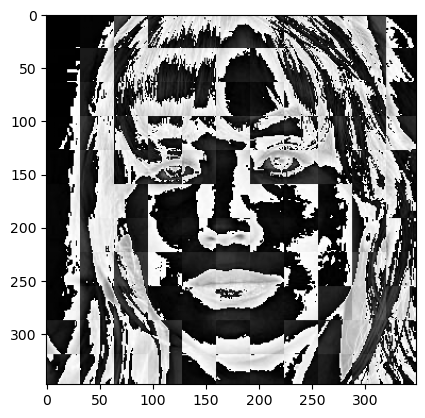

In [53]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

<a id = "5" ></a>
# <span style="font-family:serif; font-size:22px;"> 5.2 Originalbild (raw) und das Wavelet-Bild (w2d) vertikal untereinander anzeigen</span>
<a id = "Feauture Engineering" ></a>

<span style="font-size:16px;">Das Stacken von Original- und Waveletbild ist ein visuelles Werkzeug, um besser zu verstehen, zu analysieren und zu kommunizieren, was dein Feature-Engineering eigentlich macht.

In [58]:
## Da wir y als Zahl brauchen machen wir hier Die namen der Schauspielern als zahl 
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict # man gibt die jeweilige schauspielerin eine nummer

{'scarlett johansson ': 0,
 'monica bellucci': 1,
 'margot robbie': 2,
 'jennifer lawrence ': 3,
 'anne hathaway ': 4,
 'cropped': 5}

In [60]:
X, y = [], [] # für Modell Training
for celebrity_name, training_files in celebrity_file_names_dict.items(): ## geht durch den jeweilige Schauspieler 
    for training_image in training_files: ## geht durch jedes Bild
        img = cv2.imread(training_image) ### lesen das bildes
        scalled_raw_img = cv2.resize(img, (32, 32)) #### alle bilder in gleiche Größe bringen ( raw Bild)
        img_har = w2d(img,'db1',5) ##### w2d Bild auch in gleich Größe
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) ###### numpay: VStack kannman die untereinander darstellen 
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     ## name of celebrity 

In [64]:
len(X[0])

4096

In [68]:
## wegen weitere modelling die in float ändern
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape 

(462, 4096)

In [70]:
X[0]

array([230., 220., 216., ..., 134.,   1., 247.])

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Model Training</span>
<a id="model Training"></a>

In [75]:
celebrity_file_names_dict

{'scarlett johansson ': ['/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _1.png',
  '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _2.png',
  '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _3.png',
  '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _4.png',
  '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _5.png',
  '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _6.png',
  '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _7.png',
  '/Users/coco/Desktop/Hollywood Actress Classifier/Model/dataset/cropped/scarlett johansson /scarlett johansson _8.png',
 

<a id = "6" ></a>
# <span style="font-family:serif; font-size:22px;"> 6.1 Support Vector Machine (SVM)</span>
<a id = "svm" ></a>

<span style="font-size:16px;">Als erstes Modell zur Klassifikation der Gesichtsbilder wurde eine Support Vector Machine (SVM) eingesetzt. Die SVM ist besonders geeignet für Bilddaten, da sie auch bei hoher Dimensionalität und kleineren Trainingsmengen gute Ergebnisse liefern kann.

<span style="font-size:19px;">Warum SVM?

* Sie arbeitet mit sogenannten Hyperflächen, die verschiedene Klassen voneinander trennen. 
* Durch den Einsatz eines geeigneten Kernels (z. B. RBF oder linear) kann das Modell auch nichtlineare Zusammenhänge lernen.
* In Kombination mit den extrahierten Features (Originalbild + Wavelet-Features) bietet SVM eine starke Basis für die Klassifikation.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6551724137931034

In [90]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.76      0.67        37
           1       0.76      0.65      0.70        20
           2       0.42      0.47      0.44        17
           3       1.00      0.48      0.65        21
           4       0.71      0.81      0.76        21

    accuracy                           0.66       116
   macro avg       0.70      0.63      0.64       116
weighted avg       0.70      0.66      0.66       116



<a id = "6" ></a>
# <span style="font-family:serif; font-size:22px;"> 6.2 GridSearch</span>
<a id = "GridSearch" ></a>

* Mit GridSearch werden verschiedene Modelle mit unterschiedlichen Parametern getestet. Ziel ist es, das beste Modell mit den am besten geeigneten Parametern zu finden.

In [102]:
# dic für unsere Modelle und deren Parameter
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [106]:
Beste Modell auswählen
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) #classifier
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

,model,best_score,best_params
0,svm,0.682029,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.424596,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.664762,{'logisticregression__C': 1}


In [110]:
best_estimators["svm"].score(X_test,y_test)

0.6551724137931034

In [112]:
best_estimators['random_forest'].score(X_test,y_test)

0.5258620689655172

In [114]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [116]:
best_clf = best_estimators['logistic_regression']

In [120]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[29,  1,  4,  1,  2],
       [ 0, 16,  1,  1,  2],
       [ 0,  2, 15,  0,  0],
       [ 3,  1,  3, 14,  0],
       [ 2,  4,  1,  1, 13]])

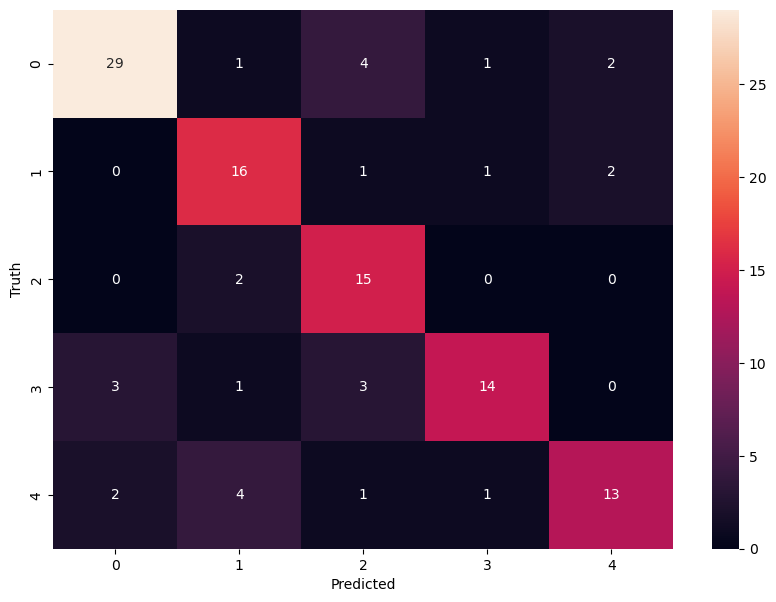

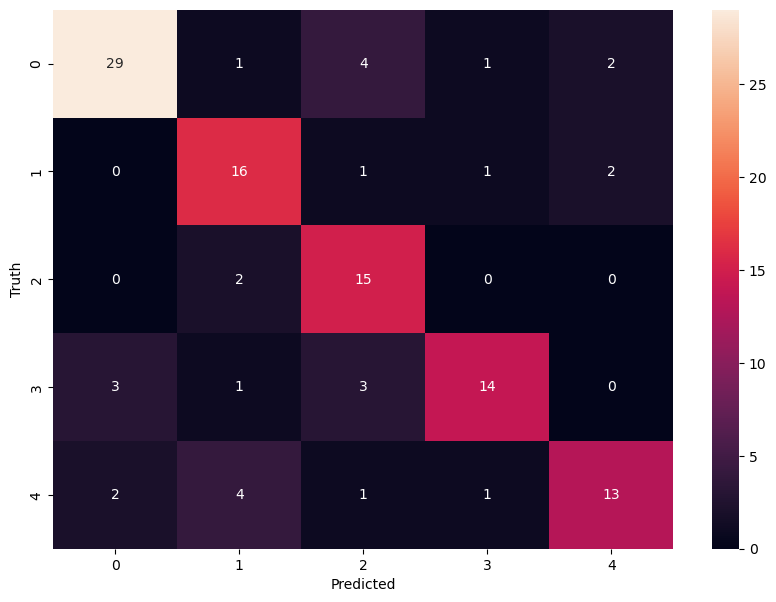

In [130]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Model speichern</span>
<a id="model Training"></a>

In [144]:
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Class dictionary speichern</span>
<a id="class dictionery"></a>

In [146]:
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))